In [1]:
import numpy as np
import pandas as pd
import h5py
from matplotlib import pyplot as plt

In [2]:
counts = h5py.File('../ENCSR000EGM/shap/counts_scores.h5', 'r')
list(counts.keys())

['coords_chrom', 'coords_end', 'coords_start', 'hyp_scores', 'input_seqs']

In [3]:
c_chrom = counts['coords_chrom']
c_start = counts['coords_start']
c_end = counts['coords_end']
c_scores = counts['hyp_scores']
c_seqs = counts['input_seqs']

In [4]:
print(c_chrom.shape, c_start.shape, c_end.shape, c_scores.shape, c_seqs.shape)

(6085,) (6085,) (6085,) (6085, 2114, 4) (6085, 2114, 4)


In [5]:
print(c_chrom[0:20])
print(c_start[0:20])
print(c_end[0:20])
print(c_end[0:20] - c_start[0:20])

[b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1'
 b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1' b'chr1'
 b'chr1' b'chr1']
[ 35640622  27599620   1943295 159924769   7953436  46521396 246568606
   1012413  23691290  54763744  26125033  43649095  52032155  33181082
 228108449 229554397 220088913 234723447   6757471  26787301]
[ 35642736  27601734   1945409 159926883   7955550  46523510 246570720
   1014527  23693404  54765858  26127147  43651209  52034269  33183196
 228110563 229556511 220091027 234725561   6759585  26789415]
[2114 2114 2114 2114 2114 2114 2114 2114 2114 2114 2114 2114 2114 2114
 2114 2114 2114 2114 2114 2114]


In [6]:
print(c_scores[0])

[[ 0.0000000e+00  9.0533095e-11 -3.6332795e-10 -2.4071803e-10]
 [ 9.0250502e-10  2.2048330e-09  4.0825360e-10  7.7786411e-10]
 [ 2.0151804e-10  1.5396592e-10 -2.9339067e-10 -1.9275824e-10]
 ...
 [ 2.1636579e-09  9.0871716e-10  6.4975039e-09  1.1171882e-08]
 [ 0.0000000e+00 -1.7680643e-08 -7.0785773e-09 -9.2708214e-09]
 [-6.0532703e-09 -4.6850057e-10  0.0000000e+00 -1.3870430e-09]]


In [7]:
prof = h5py.File('../ENCSR000EGM/shap/profile_scores.h5', 'r')
list(prof.keys())

['coords_chrom', 'coords_end', 'coords_start', 'hyp_scores', 'input_seqs']

In [8]:
p_chrom = prof['coords_chrom']
p_start = prof['coords_start']
p_end = prof['coords_end']
p_scores = prof['hyp_scores']
p_seqs = prof['input_seqs']

In [9]:
print(p_scores[0])

[[ 0.00000000e+00 -1.14437106e-12 -4.71664244e-12 -5.02614400e-12]
 [-4.31048010e-11 -6.98534494e-11 -1.33720977e-11 -3.24076391e-11]
 [ 5.07336784e-10 -2.00047895e-10  1.01325737e-09  7.10773995e-10]
 ...
 [ 2.43642218e-10 -1.40452155e-11  4.40392417e-10  1.02862732e-10]
 [ 0.00000000e+00  2.71074663e-10  4.09322853e-10  1.25612590e-10]
 [ 1.23606278e-10  1.22622718e-10  0.00000000e+00  1.09855597e-10]]


In [10]:
print(p_seqs[0])

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [11]:
print(p_scores[0].shape, p_scores[0].dtype, p_scores)

(2114, 4) float32 <HDF5 dataset "hyp_scores": shape (6085, 2114, 4), type "<f4">


In [12]:
print(p_scores.shape)

(6085, 2114, 4)


In [13]:
print(type(p_scores))

<class 'h5py._hl.dataset.Dataset'>


In [14]:
pscore = np.asarray(p_scores)

In [15]:
temp = np.asarray(p_scores[0])
pscore_A = temp[:, 0]
pscore_C = temp[:, 1]
pscore_G = temp[:, 2]
pscore_T = temp[:, 3]

<BarContainer object of 2114 artists>

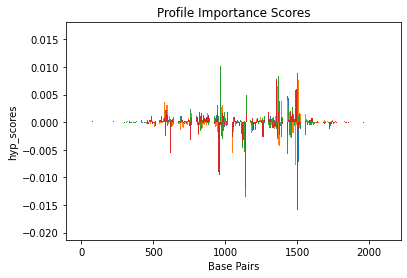

In [16]:
plt.title("Profile Importance Scores")
plt.xlabel("Base Pairs")
plt.ylabel("hyp_scores")
A_index = np.arange(0, 2114)
plt.bar(A_index, pscore_A)
plt.bar(A_index, pscore_C)
plt.bar(A_index, pscore_G)
plt.bar(A_index, pscore_T)

In [17]:
def get_scores_between(psA, psC, psG, psT, start, end):
    return psA[start:end], psC[start:end], psG[start:end], psT[start:end], np.arange(start, end)

<BarContainer object of 100 artists>

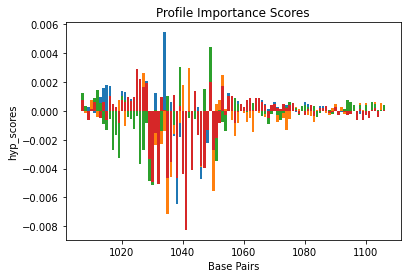

In [18]:
psA, psC, psG, psT, ind = get_scores_between(pscore_A, pscore_C, pscore_G, pscore_T, 1007, 1107)
plt.title("Profile Importance Scores")
plt.xlabel("Base Pairs")
plt.ylabel("hyp_scores")
plt.bar(ind, psA)
plt.bar(ind, psC)
plt.bar(ind, psG)
plt.bar(ind, psT)

In [19]:
def get_imp(scores, seqs, start, end):
    scores = np.asarray(scores)
    seqs = np.asarray(seqs)
    vals = np.multiply(scores, seqs)
    psA = vals[start:end, 0]
    psC = vals[start:end, 1]
    psG = vals[start:end, 2]
    psT = vals[start:end, 3]
    return psA, psC, psG, psT

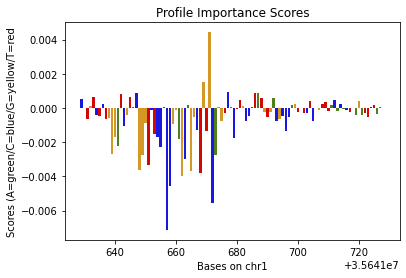

In [20]:
entry = 0
start = 1007
end = 1107
psA, psC, psG, psT = get_imp(p_scores[entry], p_seqs[entry], start, end)
ind = np.arange(p_start[0]+start, p_start[0]+end)
plt.title("Profile Importance Scores")
s = "Bases on " + p_chrom[entry].decode("utf-8")
plt.xlabel(s)
plt.ylabel("Scores (A=green/C=blue/G=yellow/T=red")
plt.bar(ind, psA, color = '#4D7F1E')
plt.bar(ind, psC, color = '#1A17E1')
plt.bar(ind, psG, color = '#D69824')
plt.bar(ind, psT, color = '#D40603')
plt.savefig('profileimp.png')

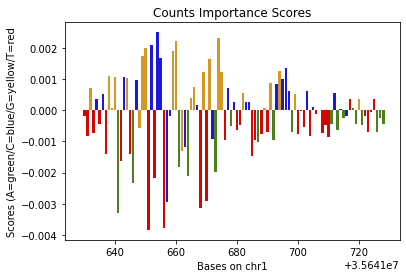

In [21]:
entry = 0
start = 1007
end = 1107
csA, csC, csG, csT = get_imp(c_scores[entry], c_seqs[entry], start, end)
indC = np.arange(c_start[0]+start, c_start[0]+end)
plt.title("Counts Importance Scores")
sc = "Bases on " + c_chrom[entry].decode("utf-8")
plt.xlabel(s)
plt.ylabel("Scores (A=green/C=blue/G=yellow/T=red")
plt.bar(ind, csA, color = '#4D7F1E')
plt.bar(ind, csC, color = '#1A17E1')
plt.bar(ind, csG, color = '#D69824')
plt.bar(ind, csT, color = '#D40603')
plt.savefig('countimp.png')